In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Task 1

In [2]:
class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.xfeatures2d.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

In [3]:
img = cv2.imread('COMP9517_20T2_Lab2_Image.jpg')

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
sift = SiftDetector()

In [6]:
kp, des = sift.detector.detectAndCompute(gray, None)

In [7]:
len(kp)

6233

In [8]:
img_T1a = cv2.drawKeypoints(image=gray, keypoints=kp, outImage=gray)

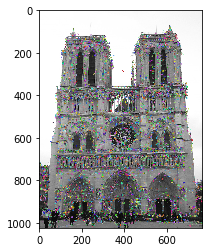

In [9]:
plt.imshow(img_T1a)

In [10]:
cv2.imwrite('Task_1_a.jpg', img_T1a)

True

In [11]:
# I vary the parameter contrastThreshold,
# adjusting the value so that the number of keypoints
# becomes about 10% of all default keypoints.

In [12]:
params={}
params["n_features"]=0
params["n_octave_layers"]=3
params["contrast_threshold"]=0.136
params["edge_threshold"]=10
params["sigma"]=1.6

In [13]:
sift_T1b = SiftDetector(params=params)

In [14]:
kp1, des1 = sift_T1b.detector.detectAndCompute(gray, None)

In [15]:
len(kp1)

625

In [16]:
img_T1b = cv2.drawKeypoints(image=gray, keypoints=kp1, outImage=gray)

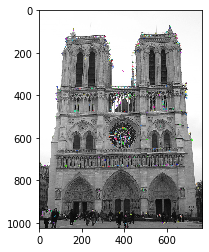

In [17]:
plt.imshow(img_T1b)

In [18]:
cv2.imwrite('Task_1_b.jpg', img_T1b)

True

# Task 2

In [19]:
img_resized = cv2.resize(gray, (0, 0), fx=1.15, fy=1.15)

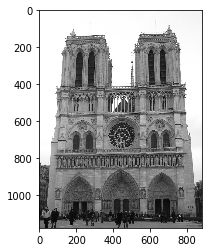

In [20]:
plt.imshow(img_resized, cmap='gray')

In [21]:
kp2, des2 = sift_T1b.detector.detectAndCompute(img_resized, None)

In [22]:
img_T2b = cv2.drawKeypoints(image=img_resized, keypoints=kp2, outImage=img_resized)

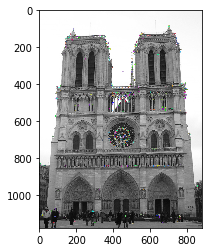

In [23]:
plt.imshow(img_T2b)

In [24]:
cv2.imwrite('Task_2_b.jpg', img_T2b)

True

## Task 2c

In [25]:
# The keypoints of the scaled image are roughly the same as those
# of the original image, which implies that the SIFT features are invariant
# after scaling because SIFT is designed to be invariant to scale and rotation.

In [26]:
bf_2d = cv2.BFMatcher()

In [27]:
matches_2d = bf_2d.knnMatch(des1, des2, k=2)
good_2d = []
for m, n in matches_2d:
    if m.distance < 0.75*n.distance:
        good_2d.append([m])
good_2d = sorted(good_2d, key = lambda x:x[0].distance)
img_T2d = cv2.drawMatchesKnn(gray, kp1, img_resized, kp2, good_2d[:5], None)

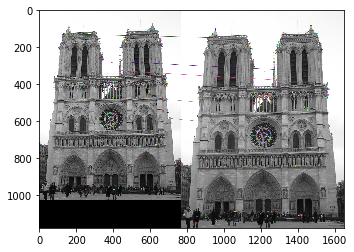

In [28]:
plt.imshow(img_T2d)

In [29]:
cv2.imwrite('Task_2_d.jpg', img_T2d)

True

# Task 3

In [30]:
def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]
    cos = np.abs(rot_matrix[0, 0])
    sin = np.abs(rot_matrix[0, 1])
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))
    rot_matrix[0, 2] += (new_w / 2) - x
    rot_matrix[1, 2] += (new_h / 2) - y
    return cv2.warpAffine(image, rot_matrix, (new_w, new_h))

In [31]:
def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2

    return center

In [32]:
img_center = get_img_center(gray)

In [33]:
img_center

(512, 384)

In [34]:
x = img_center[1]
y = img_center[0]
angle = 60

In [35]:
img_rotated = rotate(gray, x, y, -angle)

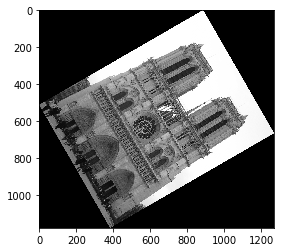

In [36]:
plt.imshow(img_rotated, cmap='gray')

In [37]:
kp3, des3 = sift_T1b.detector.detectAndCompute(img_rotated, None)

In [38]:
img_T3b = cv2.drawKeypoints(image=img_rotated, keypoints=kp3, outImage=img_rotated)

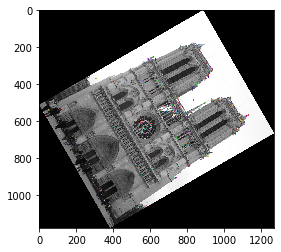

In [39]:
plt.imshow(img_T3b)

In [40]:
cv2.imwrite('Task_3_b.jpg', img_T3b)

True

## Task 3c

In [41]:
# The keypoints of the rotated image are roughly the same as those
# of the original image, which implies the SIFT features are invariant after
# rotation because SIFT is designed to be invariant to scale and rotation.

In [42]:
bf_3d = cv2.BFMatcher()

In [43]:
matches_3d = bf_3d.knnMatch(des1, des3, k=2)
good_3d = []
for m, n in matches_3d:
    if m.distance < 0.75*n.distance:
        good_3d.append([m])
good_3d = sorted(good_3d, key = lambda x:x[0].distance)
img_T3d = cv2.drawMatchesKnn(gray, kp1, img_rotated, kp3, good_3d[:7], None) # we can see there are five lines in the img_T3d

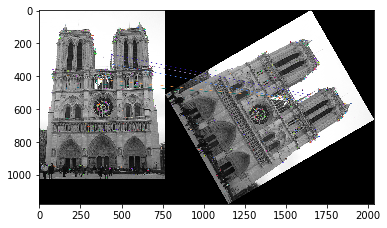

In [44]:
plt.imshow(img_T3d)

In [45]:
cv2.imwrite('Task_3_d.jpg', img_T3d)

True